In [21]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [22]:
img = cv2.imread('./test_images/sachin_85.jpg')
img.shape

(120, 108, 3)

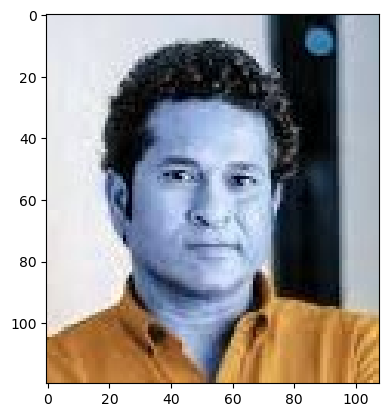

In [23]:
plt.imshow(img)

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(120, 108)

In [25]:
gray

array([[231, 231, 230, ..., 181, 180, 179],
       [231, 231, 230, ..., 181, 180, 179],
       [231, 231, 231, ..., 182, 180, 179],
       ...,
       [119, 126, 127, ..., 102, 140, 146],
       [118, 123, 127, ..., 122, 159, 156],
       [117, 120, 126, ..., 176, 138, 142]], dtype=uint8)

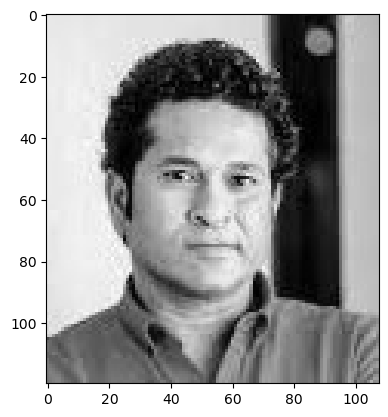

In [26]:
plt.imshow(gray, cmap='gray')

In [27]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[24, 30, 59, 59]], dtype=int32)

In [28]:
(x,y,w,h) = faces[0]

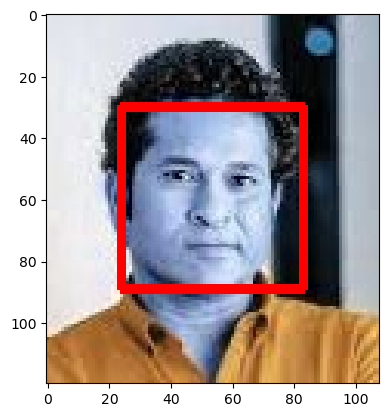

In [29]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

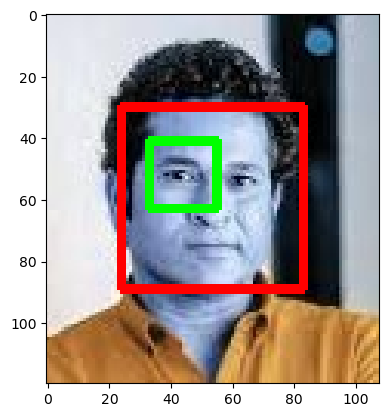

In [30]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

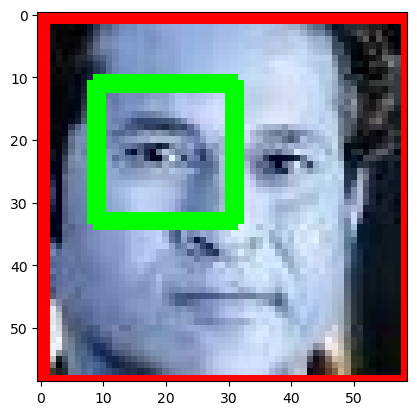

In [31]:
plt.imshow(roi_color,cmap='gray')

In [ ]:
def face_detection(path):
    
    img  = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)

    for face in faces:
        roi_gray  = gray[y:y+h, x:x+w]
        roi_color =  img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if(len(eyes)) >=1:
            return roi_color